In [2]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress
from cartoplot import cartoplot
from netCDF4 import Dataset

In [6]:
grid_cell_area = 25_067**2

d = Dataset('/media/robbie/TOSHIBA EXT/weekly_NSIDC_age/iceage_nh_12.5km_19840101_19841231_v4.1.nc')

lons = np.array(d['longitude'])
lats = np.array(d['latitude'])

def get_j1_age(year,week_no=0):
    
    d = Dataset(f'/media/robbie/TOSHIBA EXT/weekly_NSIDC_age/iceage_nh_12.5km_{year}0101_{year}1231_v4.1.nc')
    j1_age = np.array(d['age_of_sea_ice'][week_no]).astype(np.float32)
    j1_age[j1_age>15] = np.nan
    j1_age[j1_age<1] = np.nan
    return(j1_age)

dx = np.diff(d['x'])
dy = np.diff(d['y'])

areas = np.multiply(dx,dy)

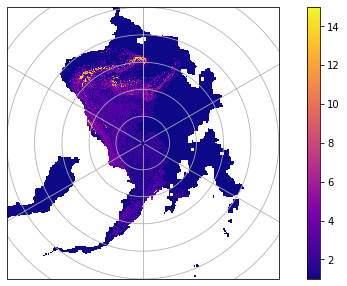

In [7]:
cartoplot(lons,lats,get_j1_age(2015),land=False)

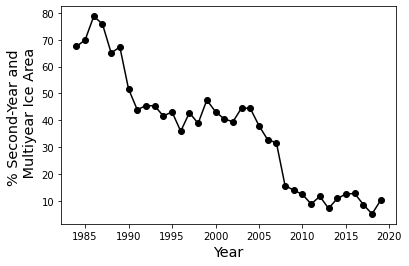

In [8]:
years = np.arange(1984,2020)
age_fracs = []
old_ice_areas = []

for year in years:

    age_data = get_j1_age(year,week_no=0)
    
    old_ice_area = np.count_nonzero(age_data[age_data>3])*grid_cell_area/1e6
    
    old_ice_areas.append(old_ice_area)

    age_frac = 100*np.count_nonzero(age_data[age_data>3])/np.count_nonzero(age_data[age_data<2])
    
    age_fracs.append(age_frac)
    
    
plt.plot(years,age_fracs,marker='o',color='k')

plt.ylabel('% Second-Year and \n Multiyear Ice Area', fontsize='x-large')

plt.xlabel('Year', fontsize='x-large')

plt.show()

# plt.plot(years,old_ice_areas)